<a href="https://colab.research.google.com/github/yashsinghkvojhar/yashsinghkvojhar/blob/main/Ola_Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

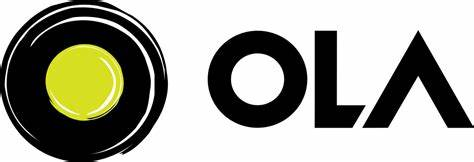

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('ola_driver_scaler.csv')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',None)

df.sample(frac=1).head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5275,5275,04/01/20,784,41.0,0.0,C17,2.0,100303.0,04/06/20,NaN,3.0,3.0,0.0,1.0
11618,11618,11/01/19,1722,41.0,0.0,C27,2.0,76806.0,30/07/15,NaN,1.0,3.0,0.0,2.0
8538,8538,04/01/19,1261,29.0,0.0,C17,0.0,73103.0,25/11/16,NaN,2.0,2.0,0.0,1.0
4486,4486,07/01/20,662,37.0,0.0,C29,1.0,76548.0,17/10/16,NaN,1.0,2.0,453280.0,3.0
6015,6015,01/01/20,895,30.0,0.0,C14,2.0,34868.0,13/09/19,NaN,1.0,1.0,0.0,1.0


Drop 'Unnamed:0' because its not need in analysis

In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.shape

(17784, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                17784 non-null  object 
 1   Driver_ID             17784 non-null  int64  
 2   Age                   17728 non-null  float64
 3   Gender                17740 non-null  float64
 4   City                  17783 non-null  object 
 5   Education_Level       17783 non-null  float64
 6   Income                17783 non-null  float64
 7   Dateofjoining         17783 non-null  object 
 8   LastWorkingDate       1500 non-null   object 
 9   Joining Designation   17783 non-null  float64
 10  Grade                 17783 non-null  float64
 11  Total Business Value  17783 non-null  float64
 12  Quarterly Rating      17783 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


Dataset 19104 drivers record

In [9]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Yearofreporting']=df['MMM-YY'].dt.year
df['Monthofreporting']=df['MMM-YY'].dt.month

df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['Yearofjoining']=df['Dateofjoining'].dt.year
df['Monthofjoining']=df['Dateofjoining'].dt.month

df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])
df['YearofLastworking']=df['LastWorkingDate'].dt.year
df['MonthofLastworking']=df['LastWorkingDate'].dt.month

<ipython-input-9-77382c1490e5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
<ipython-input-9-77382c1490e5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
<ipython-input-9-77382c1490e5>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])


In [10]:
df['Education_Level']=df['Education_Level'].astype('object')
df['Gender']=df['Gender'].astype('object')

df['Yearofreporting']=df['Yearofreporting'].astype('object')
df['Monthofreporting']=df['Monthofreporting'].astype('object')

df['Yearofjoining']=df['Yearofjoining'].astype('object')
df['Monthofjoining']=df['Monthofjoining'].astype('object')

df['YearofLastworking']=df['YearofLastworking'].astype('object')
df['MonthofLastworking']=df['MonthofLastworking'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                17784 non-null  datetime64[ns]
 1   Driver_ID             17784 non-null  int64         
 2   Age                   17728 non-null  float64       
 3   Gender                17740 non-null  object        
 4   City                  17783 non-null  object        
 5   Education_Level       17783 non-null  object        
 6   Income                17783 non-null  float64       
 7   Dateofjoining         17783 non-null  datetime64[ns]
 8   LastWorkingDate       1500 non-null   datetime64[ns]
 9   Joining Designation   17783 non-null  float64       
 10  Grade                 17783 non-null  float64       
 11  Total Business Value  17783 non-null  float64       
 12  Quarterly Rating      17783 non-null  float64       
 13  Yearofreporting 

In [12]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,17784.0,1320.705072,7.586185e+02,1.0,653.0,1315.0,1984.75,2597.0
Age,17728.0,34.729298,6.288023e+00,21.0,30.0,34.0,39.00,58.0
Income,17783.0,65901.971096,3.101630e+04,10747.0,42605.5,60228.0,84516.00,188418.0
Joining Designation,17783.0,1.687398,8.367893e-01,1.0,1.0,1.0,2.00,5.0
Grade,17783.0,2.249902,1.022617e+00,1.0,1.0,2.0,3.00,5.0
Total Business Value,17783.0,573509.425294,1.138485e+06,-6000000.0,0.0,250000.0,700000.00,33747720.0
Quarterly Rating,17783.0,2.009953,1.012331e+00,1.0,1.0,2.0,3.00,4.0


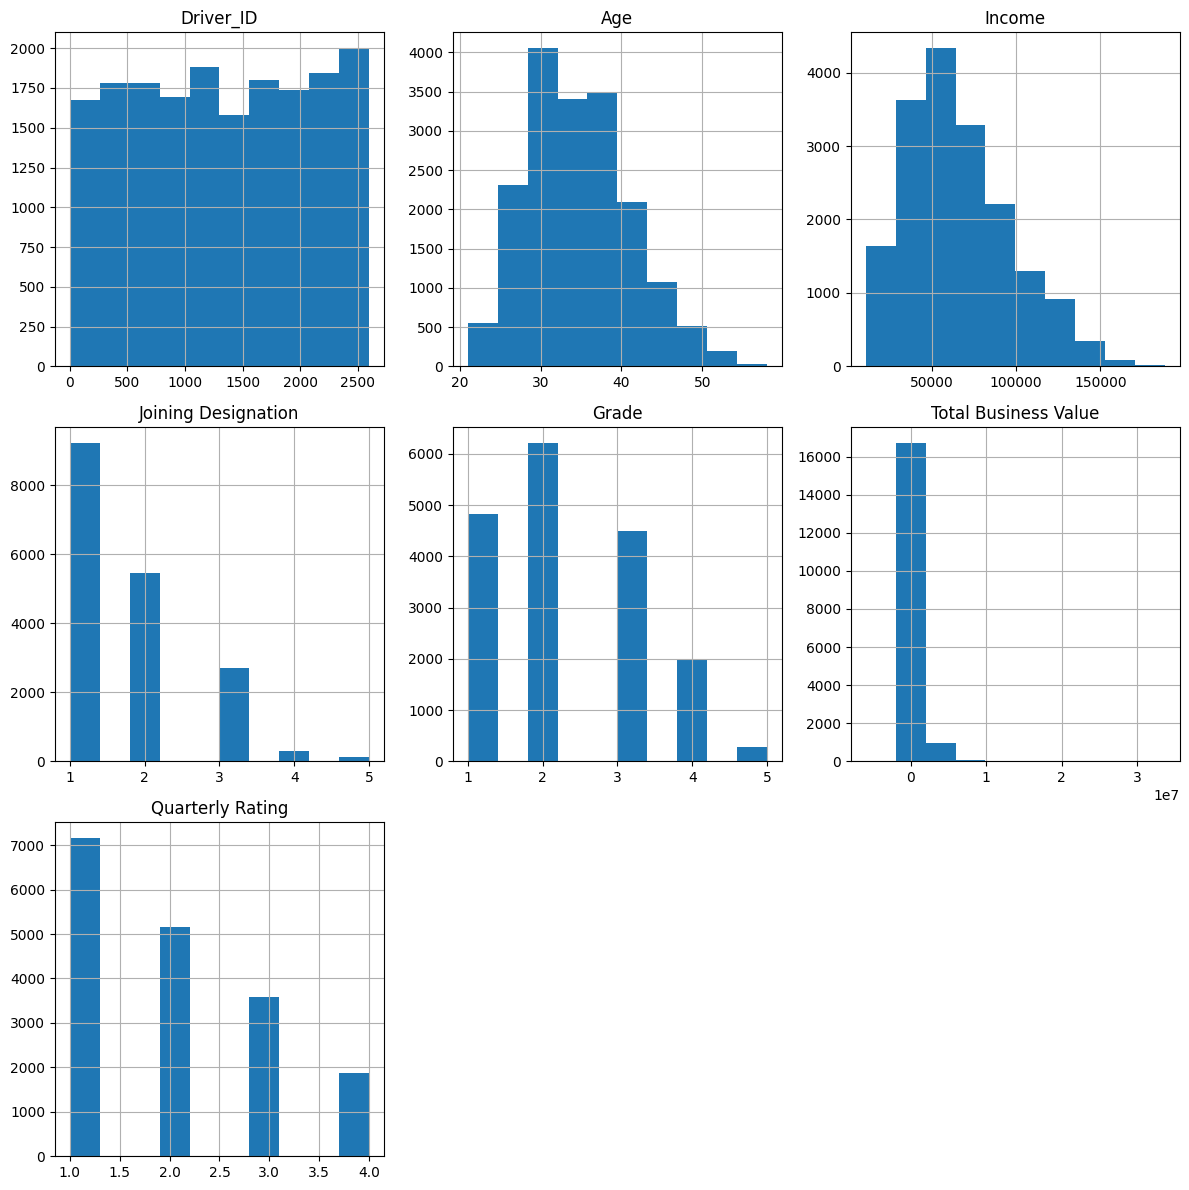

In [13]:
df.hist(df.select_dtypes(include='number').columns,figsize=(12,12))
plt.tight_layout()
plt.show()

* Driver age Distribution is normal but we observe some outliers.
* The total busines svalue is highly skewed with very high outliers indicating that a small chunk of drivers contribute to the total revenue of the company.
* Income distribution is slightly right skewed with some outliers.

In [14]:
df.describe(include='object').T

,count,unique,top,freq
Gender,17740.0,2.0,0.0,10264.0
City,17783,29,C20,949
Education_Level,17783.0,3.0,1.0,6441.0
Yearofreporting,17784,2,2019,9013
Monthofreporting,17784,12,1,1680
Yearofjoining,17783.0,8.0,2018.0,4703.0
Monthofjoining,17783.0,12.0,7.0,2482.0
YearofLastworking,1500.0,3.0,2019.0,766.0
MonthofLastworking,1500.0,12.0,7.0,168.0


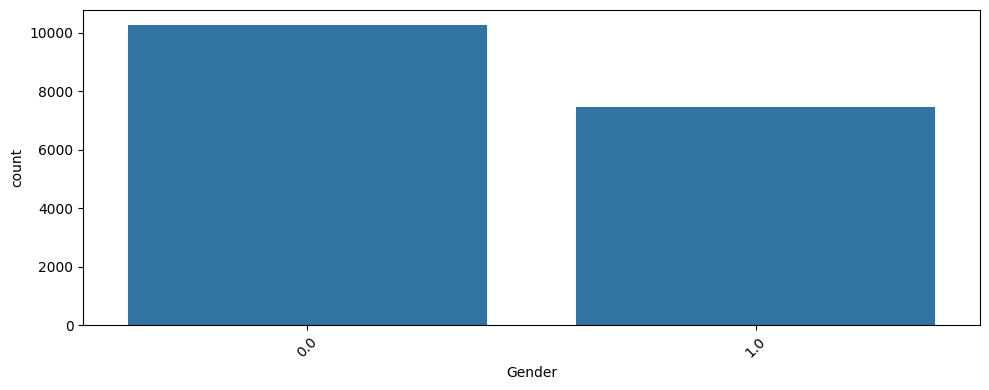

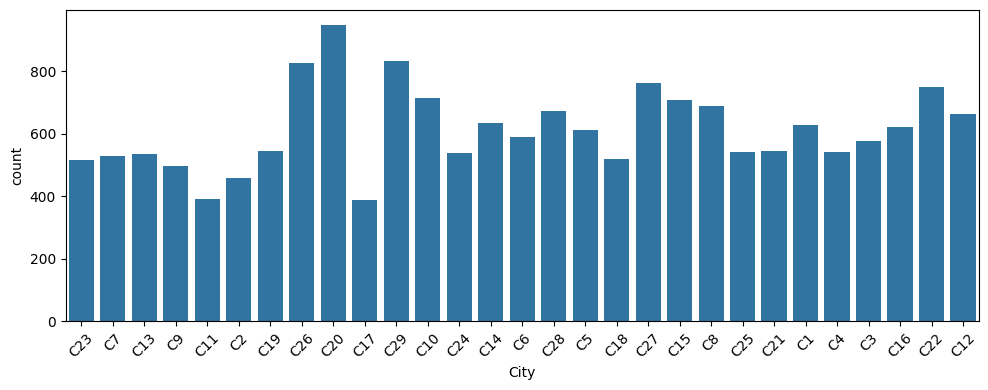

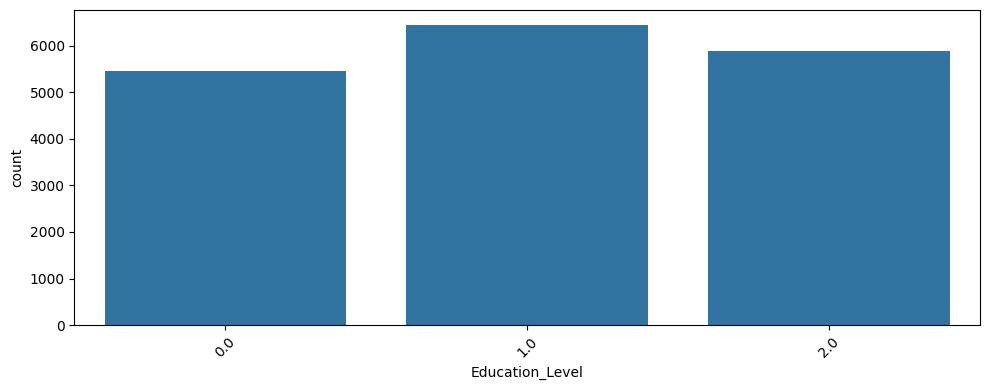

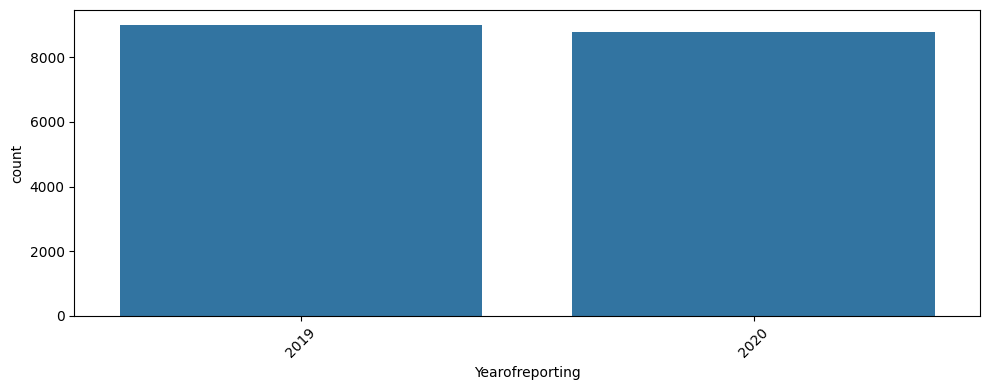

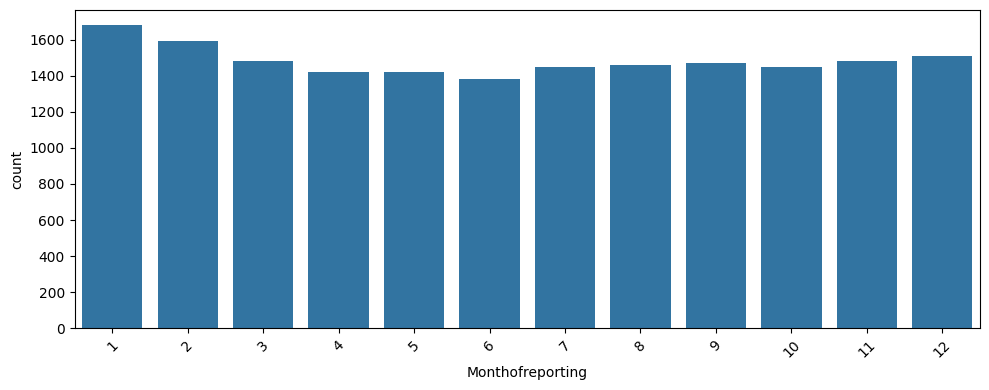

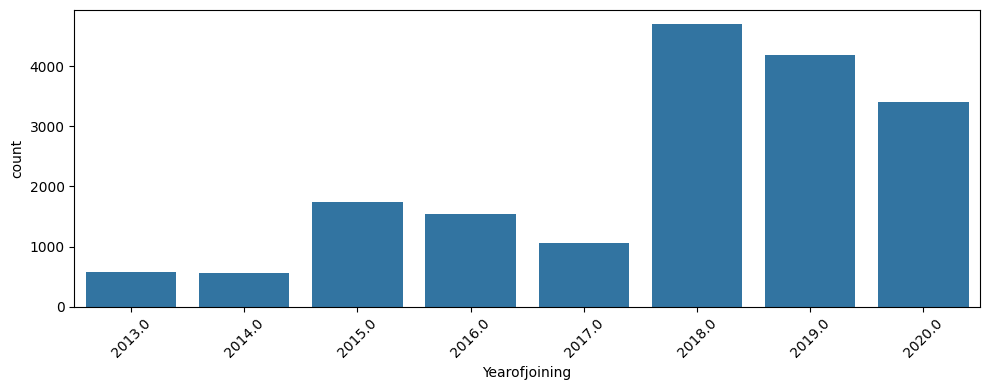

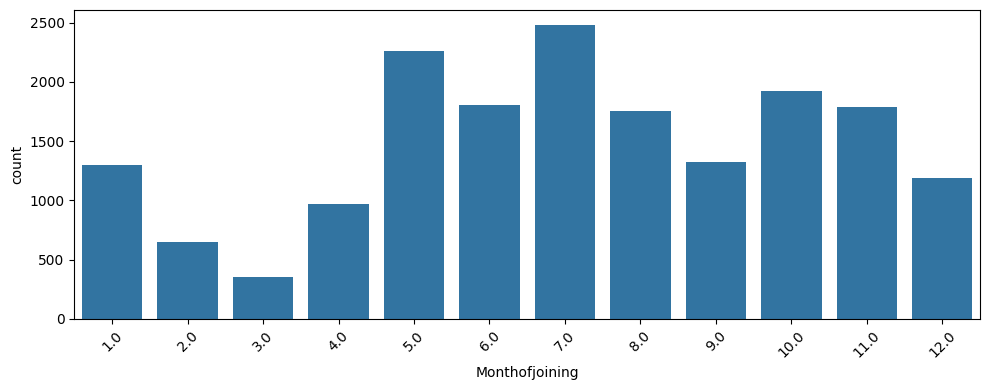

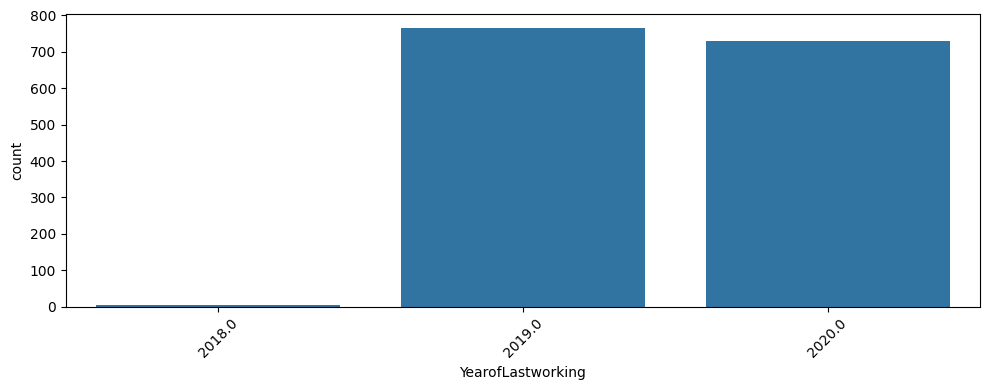

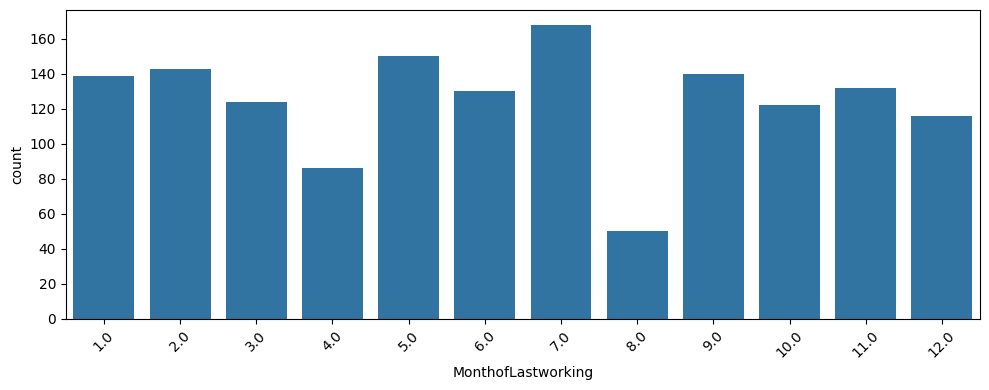

In [15]:
for i in df.select_dtypes(include='object').columns:
  plt.figure(figsize=(10,4))
  sns.countplot(df,x=i)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

* City code with C20 has highest no.of employees followed by C29 and C26.
* 42% are women and 58% are men drivers.
*26% of the drivers in our dataset joined in the year 2018-2019. The number of new joinees reduced in 2020.
* 40% of drivers have a rating of 1 and only 10% have rating of 4.
Only 3% have a joining designation of 4 or 5. 51% have a designation of 1.
* 35% of drivers fall into grade 2 and only 2% fall into a higher grade. Indicating most of the driver population is relatively recently recruited. A strong indicator of the problem of attrition.
* More or less equal distribution of drivers at each of the three Education levels= 10+,12+ and graduate.There is a * possibility to offer subsidized education programs to the drivers in order to cement driver loyalty.

* We observe difference in counts indicating missing values in a fea columns.
* Mean and Median for Income and Total Business Value significantly differ and indicative of outliers.

In [16]:
df.duplicated().sum()

0

In [17]:
df.nunique()

MMM-YY                    24
Driver_ID               2216
Age                       36
Gender                     2
City                      29
Education_Level            3
Income                  2223
Dateofjoining            846
LastWorkingDate          486
Joining Designation        5
Grade                      5
Total Business Value    9569
Quarterly Rating           4
Yearofreporting            2
Monthofreporting          12
Yearofjoining              8
Monthofjoining            12
YearofLastworking          3
MonthofLastworking        12
dtype: int64

* Dataset for 24 months for drivers in 29 different cities.
* Our dataset has 19104 entries for 2381 unique drivers, this is inline with our observation above regarding the multiple records for single driver.
*493 drivers have churned out of the 2381 drivers.
*5 unique grades and 4 unique quarterly ratings for the drivers.

In [18]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        56
Gender                     44
City                        1
Education_Level             1
Income                      1
Dateofjoining               1
LastWorkingDate         16284
Joining Designation         1
Grade                       1
Total Business Value        1
Quarterly Rating            1
Yearofreporting             0
Monthofreporting            0
Yearofjoining               1
Monthofjoining              1
YearofLastworking       16284
MonthofLastworking      16284
dtype: int64

KNN imputation for columns with null values

1.   Age
2.   Gender



In [19]:
df_impute=df.select_dtypes(exclude='datetime')

In [20]:
df_impute.isnull().sum()

Driver_ID                   0
Age                        56
Gender                     44
City                        1
Education_Level             1
Income                      1
Joining Designation         1
Grade                       1
Total Business Value        1
Quarterly Rating            1
Yearofreporting             0
Monthofreporting            0
Yearofjoining               1
Monthofjoining              1
YearofLastworking       16284
MonthofLastworking      16284
dtype: int64

drop Driver_ID and City as they contain string characters and drop YearLastworking and MonthLastworking because their values will be drived from LastWorkingDate

In [21]:
df_impute.drop(['Driver_ID','City','YearofLastworking','MonthofLastworking'],axis=1,inplace=True)

In [22]:
columns=df_impute.columns
columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Yearofreporting',
       'Monthofreporting', 'Yearofjoining', 'Monthofjoining'],
      dtype='object')

In [23]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean')
df_new=imputer.fit_transform(df_impute)


In [24]:
df_new=pd.DataFrame(df_new)

In [25]:
df_new.columns=columns

In [26]:
df_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Yearofreporting         0
Monthofreporting        0
Yearofjoining           0
Monthofjoining          0
dtype: int64

In [27]:
rem_cols=list(set(df.columns).difference(set(columns)))
rem_cols

['LastWorkingDate',
 'City',
 'YearofLastworking',
 'Dateofjoining',
 'MonthofLastworking',
 'Driver_ID',
 'MMM-YY']

In [28]:
data=pd.concat([df[rem_cols],df_new],axis=1)

In [29]:
data.head(5)

,LastWorkingDate,City,YearofLastworking,Dateofjoining,MonthofLastworking,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining
0,NaT,C23,NaN,2018-12-24,NaN,1,2019-01-01,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019.0,1.0,2018.0,12.0
1,NaT,C23,NaN,2018-12-24,NaN,1,2019-02-01,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019.0,2.0,2018.0,12.0
2,2019-03-11,C23,2019.0,2018-12-24,3.0,1,2019-03-01,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019.0,3.0,2018.0,12.0
3,NaT,C7,NaN,2020-11-06,NaN,2,2020-11-01,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,11.0,2020.0,11.0
4,NaT,C7,NaN,2020-11-06,NaN,2,2020-12-01,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020.0,12.0,2020.0,11.0


There is multiple columns with same Driver-id Thus multiple values of other features which might hinder our results.
Preprossing data

In [30]:
agg_dict = {'MMM-YY':'last','Age':'max', 'Gender':'last','City':'last',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'last','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last',
           "Yearofreporting":"last","Monthofreporting":"last" ,"Yearofjoining": "first","Monthofjoining":"first"}


In [31]:
data_agg=data.groupby(['Driver_ID']).aggregate(agg_dict).reset_index()

flags for quanterly and income increase

In [32]:
qrf=df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
qrl=df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})

#flag
qr=(qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()

In [33]:
dr_id=qr[qr['Quarterly Rating']==True]['Driver_ID']

In [34]:
rating_flag=[]
for i in data_agg['Driver_ID']:
  if i in dr_id.values:
    rating_flag.append(1)
  else:
    rating_flag.append(0)

In [35]:
data_agg['Q_Rating_Inc_Flag']=rating_flag

In [36]:
inf=df.groupby('Driver_ID').agg({'Income':'first'})
inl=df.groupby('Driver_ID').agg({'Income':'last'})

ind=(inl['Income']>inf['Income']).reset_index()
dr_id=ind[ind['Income']==True]['Driver_ID']

In [37]:
inc=[]
for i in data_agg['Driver_ID']:
  if i in dr_id.values:
    inc.append(1)
  else:
    inc.append(0)
data_agg['Income_Inc_Flag']=inc

In [38]:
data_agg.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining,Q_Rating_Inc_Flag,Income_Inc_Flag
0,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,2019.0,3.0,2018.0,12.0,0,0
1,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,2020.0,12.0,2020.0,11.0,0,0
2,4,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,2020.0,4.0,2019.0,12.0,0,0
3,5,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,2019.0,3.0,2019.0,1.0,0,0
4,6,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,2020.0,12.0,2020.0,7.0,1,0


*Target variable

In [39]:
data_agg['LastWorkingDate'].isnull().sum()

716

In [40]:
data_agg['Churn']=data_agg['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [41]:
data_agg['Churn'].value_counts()

Churn
1    1500
0     716
Name: count, dtype: int64

In [42]:
data_agg['Churn'].value_counts(normalize=True)*100

Churn
1    67.689531
0    32.310469
Name: proportion, dtype: float64

In [43]:
data_agg.describe(exclude='object').T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2216.0,1301.173285,1.0,642.75,1304.5,1954.25,2597.0,750.973288
MMM-YY,2216,2020-04-01 19:56:58.050541312,2019-01-01 00:00:00,2019-09-01 00:00:00,2020-06-01 00:00:00,2020-12-01 00:00:00,2020-12-01 00:00:00,NaN
Age,2216.0,33.781137,21.0,30.0,33.0,37.0,58.0,5.966799
Gender,2216.0,0.410499,0.0,0.0,0.0,1.0,1.0,0.491627
Education_Level,2216.0,1.013538,0.0,0.0,1.0,2.0,2.0,0.816753
Income,2216.0,59423.328219,10747.0,39238.5,55299.0,75872.75,188418.0,28441.586522
Joining Designation,2216.0,1.819344,1.0,1.0,2.0,2.0,5.0,0.839521
Grade,2216.0,2.097323,1.0,1.0,2.0,3.0,5.0,0.939347
Dateofjoining,2216,2019-02-12 17:22:57.617328384,2013-04-01 00:00:00,2018-06-28 12:00:00,2019-07-28 00:00:00,2020-05-03 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1500,2019-12-22 20:17:16.800000256,2018-12-31 00:00:00,2019-06-03 00:00:00,2019-12-21 00:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN


* 2381 unique drivers
* Driver median age is 33 years and ranging from 21 yrs to 58 yrs(max).
* Mean monthly income is 59334 and 75% of driver population have their monthly income <= 75,986.
* 50% of the drivers have acquired total busines value of 8,17,680.

In [44]:
data_agg['Education_Level']=data_agg['Education_Level'].astype('object')
data_agg['Gender']=data_agg['Gender'].astype('object')

data_agg['Yearofreporting']=data_agg['Yearofreporting'].astype('object')
data_agg['Monthofreporting']=data_agg['Monthofreporting'].astype('object')

data_agg['Yearofjoining']=data_agg['Yearofjoining'].astype('object')
data_agg['Monthofjoining']=data_agg['Monthofjoining'].astype('object')

data_agg['Q_Rating_Inc_Flag']=data_agg['Q_Rating_Inc_Flag'].astype('object')
data_agg['Income_Inc_Flag']=data_agg['Income_Inc_Flag'].astype('object')

data_agg['Churn']=data_agg['Churn'].astype('object')

<Axes: title={'center': 'Age separated by Churn'}, xlabel='Age_Bin'>

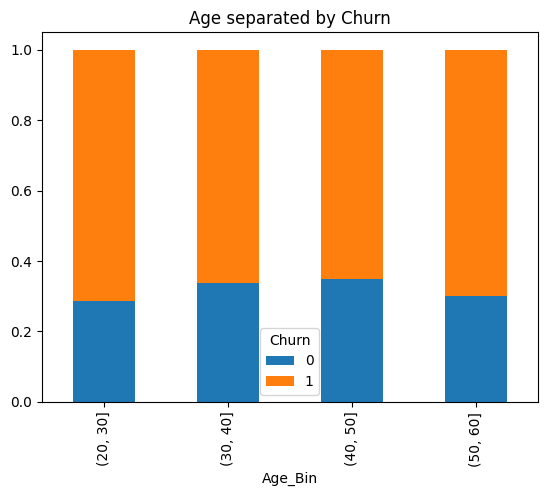

In [45]:
data_agg['Age_Bin']=pd.cut(data_agg['Age'],bins=[20,30,40,50,60])

agebin=pd.crosstab(data_agg['Age_Bin'],data_agg['Churn'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title='Age separated by Churn')

Drivers in the 30-50 years bracket have the highest churn percentage. Lower churn in the 20-30 years bracket

<Figure size 3000x700 with 0 Axes>

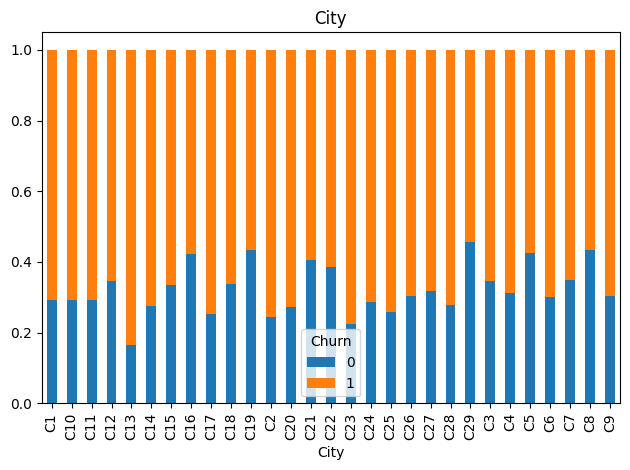

In [46]:
plt.figure(figsize=(30,7))
city = pd.crosstab(data_agg['City'],data_agg['Churn'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="City")
plt.tight_layout()

* Maximum percentage of churn is in C13 city followed by C17 and C2.
* No clear pattern derived from the city information.

<Axes: title={'center': 'Income separated by Churn'}, xlabel='Income_Bin'>

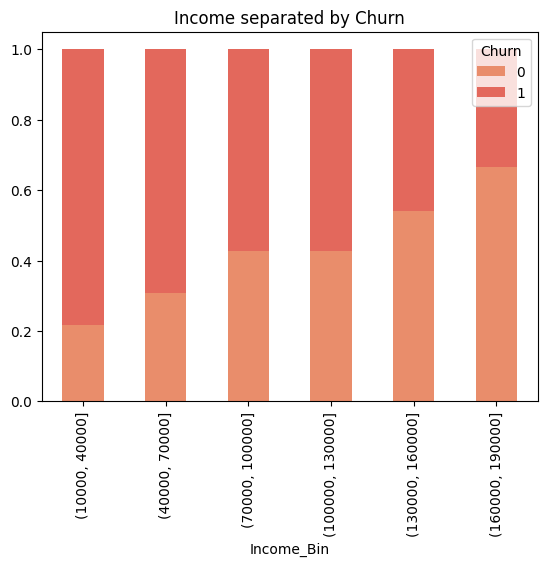

In [47]:
data_agg['Income_Bin'] = pd.cut(data_agg['Income'],bins=[10000, 40000, 70000, 100000, 130000,160000,190000])

salarybin = pd.crosstab(data_agg['Income_Bin'],data_agg['Churn'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Income separated by Churn",color=sns.color_palette("flare"))

* Drivers with lower income are more likely to churn.
* Churn is same across income brackets of 70K-100K and 100K-130K.
* The employees whose monthly income is in 130K-160K and 160K-190K are less likely to leave the organization

<Axes: title={'center': 'Total Business Value Vs Churn'}, xlabel='TBV_Bin'>

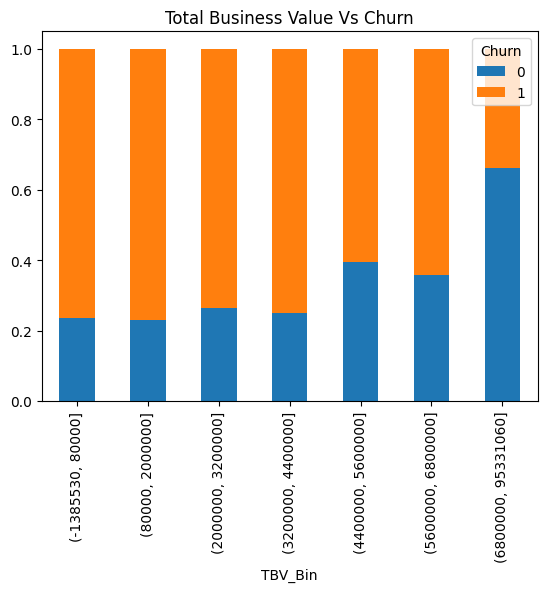

In [48]:
m1 = round(data_agg['Total Business Value'].min())
m2 = round(data_agg['Total Business Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

data_agg['TBV_Bin'] = pd.cut(data_agg['Total Business Value'],bins)

tbvbin = pd.crosstab(data_agg['TBV_Bin'],data_agg['Churn'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value Vs Churn")

* Driver with total business value equal and above 6800,000 are less likely to churn.

In [49]:
data_agg.drop(["MMM-YY","Dateofjoining","Quarterly Rating","Age_Bin","Income_Bin","TBV_Bin","Driver_ID"],axis=1, inplace=True)

In [50]:
data_agg['City']=data_agg['City'].apply(lambda x: x[1:])

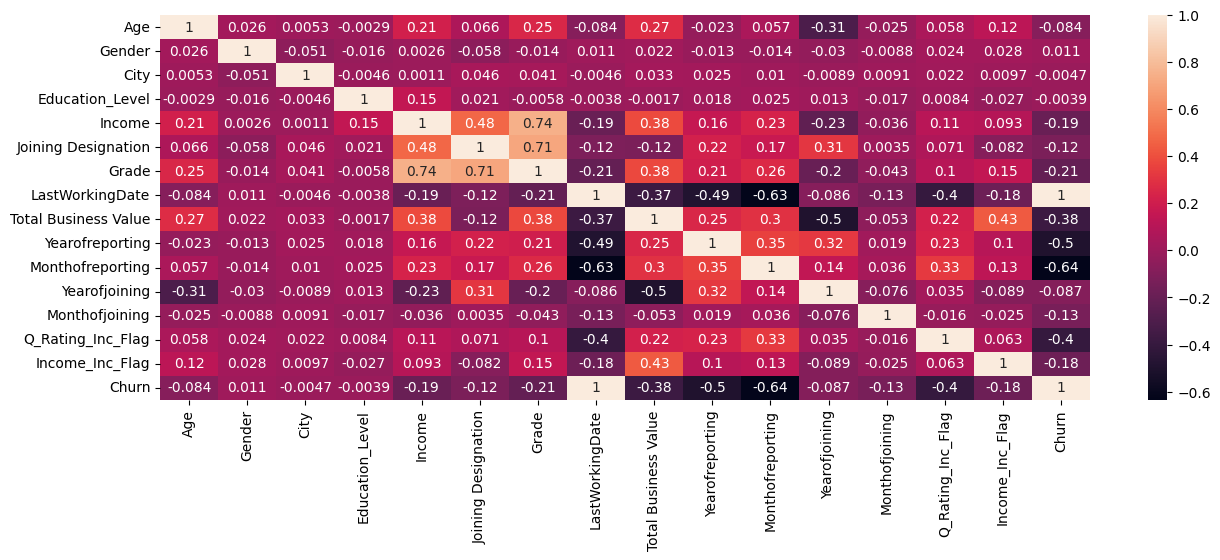

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(data_agg.corr(), annot=True,)
plt.show()

* The following are positively correlated

  * Age and Income

  * Joining designation and grade

  * Total business value and grade and income. If the grade is high then the driver has a higher income and the probability of attrition is low.

* Year of joining and Total Business are negatively correlated, indicating the longer a driver has been associated with the company the business acquired by him reduces. This needs to be investigated.

* Quarterly rating and Total Business Value are positively correlated. Meaning if the quarterly rating is high then total business acquired is also high and consequently less chance of driver attrition.

* Negative correlation between attrition and month of reporting. This indicates that drivers who are not regular in reporting every month have a high chance of attrition.

'Yearofreporting','Monthofjoining','LastWorkingDate' have value more then 0.9

In [52]:
data_agg.drop(['Yearofreporting','Monthofjoining','LastWorkingDate'],axis=1,inplace=True)

In [53]:
X=data_agg.drop(['Churn'],axis=1)
X.shape

(2216, 12)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2216 non-null   float64
 1   Gender                2216 non-null   object 
 2   City                  2216 non-null   object 
 3   Education_Level       2216 non-null   object 
 4   Income                2216 non-null   float64
 5   Joining Designation   2216 non-null   float64
 6   Grade                 2216 non-null   float64
 7   Total Business Value  2216 non-null   float64
 8   Monthofreporting      2216 non-null   object 
 9   Yearofjoining         2216 non-null   object 
 10  Q_Rating_Inc_Flag     2216 non-null   object 
 11  Income_Inc_Flag       2216 non-null   object 
dtypes: float64(5), object(7)
memory usage: 207.9+ KB


In [55]:
Y=data_agg['Churn']
Y.shape

(2216,)

In [56]:
Y.value_counts(normalize=True)*100

Churn
1    67.689531
0    32.310469
Name: proportion, dtype: float64

* We observe the imbalance between the 2 classes, namely- Not Churn (Class 0) and Churn (Class 1). The imbalance ratio Class 0: Class 1 is almost 1:2

* We will perform hyperameter tuning to address this imbalance.

imbalance data

In [57]:

import pandas as pd

# Assuming 'X' is your DataFrame with potential datetime columns

# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime']).columns

# Convert datetime columns to numerical features (e.g., ordinal)
for col in datetime_cols:
    X[col] = X[col].apply(lambda x: x.toordinal() if pd.notnull(x) else None)

# Convert Y to a NumPy array and ensure it has the correct data type (e.g., int)
Y_array = Y.to_numpy().astype(int)



# Building the Model
Model 1: Baseline model using single Decision Tree

* Cross Validation and GridSearchCV
* No class balancing

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 1369 to 1542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1417 non-null   float64
 1   Gender                1417 non-null   object 
 2   City                  1417 non-null   object 
 3   Education_Level       1417 non-null   object 
 4   Income                1417 non-null   float64
 5   Joining Designation   1417 non-null   float64
 6   Grade                 1417 non-null   float64
 7   Total Business Value  1417 non-null   float64
 8   Monthofreporting      1417 non-null   object 
 9   Yearofjoining         1417 non-null   object 
 10  Q_Rating_Inc_Flag     1417 non-null   object 
 11  Income_Inc_Flag       1417 non-null   object 
dtypes: float64(5), object(7)
memory usage: 143.9+ KB


Target Encoding

In [60]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [61]:
cat_cols=["City"] # As only contain string values in object type columns
from category_encoders import TargetEncoder
enc= TargetEncoder(cols=cat_cols).fit(X_train,Y_train)
X_train= enc.transform(X_train)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 1369 to 1542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1417 non-null   float64
 1   Gender                1417 non-null   object 
 2   City                  1417 non-null   object 
 3   Education_Level       1417 non-null   object 
 4   Income                1417 non-null   float64
 5   Joining Designation   1417 non-null   float64
 6   Grade                 1417 non-null   float64
 7   Total Business Value  1417 non-null   float64
 8   Monthofreporting      1417 non-null   object 
 9   Yearofjoining         1417 non-null   object 
 10  Q_Rating_Inc_Flag     1417 non-null   object 
 11  Income_Inc_Flag       1417 non-null   object 
dtypes: float64(5), object(7)
memory usage: 143.9+ KB
None


In [62]:
X_val= enc.transform(X_val,Y_val)
X_test= enc.transform(X_test,Y_test)

Decision Tree

In [63]:

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
Y_val = Y_val.astype(int)
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[3,5,7,9],'max_leaf_nodes':[15,20,25,30]

}

model1=DTC()
clf=GridSearchCV(model1,params,scoring='f1',cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_leaf_nodes': [15, 20, 25, 30]},
             scoring='f1')

In [64]:
res=clf.cv_results_

In [65]:
for i in range(len(res['params'])):
  print(f'Parameters:{res["params"][i]} mean_score:{res["mean_test_score"][i]} rank:{res["rank_test_score"][i]}')

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} mean_score:0.9483981558981828 rank:11
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} mean_score:0.9483981558981828 rank:11
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} mean_score:0.9483981558981828 rank:11
Parameters:{'max_depth': 3, 'max_leaf_nodes': 30} mean_score:0.9483981558981828 rank:11
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} mean_score:0.9552129197438617 rank:2
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} mean_score:0.9517536313957711 rank:7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} mean_score:0.9511972590587192 rank:8
Parameters:{'max_depth': 5, 'max_leaf_nodes': 30} mean_score:0.9501219902415148 rank:10
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} mean_score:0.9550450313813356 rank:3
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} mean_score:0.9529877207920538 rank:4
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} mean_score:0.9529300894589676 rank:5
Parameters:{'max_depth': 7, 'max_leaf_

In [66]:
print(clf.best_estimator_)
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is:{results.best_score_}')
display(clf)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=15)
Best parameters are : {'max_depth': 9, 'max_leaf_nodes': 15}
The score is:0.9592195224474039


In [67]:
model1=clf.best_estimator_
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=15)

In [68]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,X,Y,title):
  train_sizes,train_scores,test_scores,_,_=learning_curve(estimator,X,Y,return_times=True)
  fig,axes=plt.subplots(1,1,figsize=(10,5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel('training examples')
  axes.set_ylabel('Score')

  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)

  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean-train_scores_std,
      train_scores_mean+train_scores_std,
      alpha=0.1,
      color='r'
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean-test_scores_std,
      test_scores_mean+test_scores_std,
      alpha=0.1,
      color='g'
  )
  axes.plot(
        train_sizes,train_scores_mean,'o-',color='r',label='training score'
    )
  axes.plot(
        train_sizes,test_scores_mean,'o-',color='g',label='Cross_validation score'
    )
  axes.legend(loc='best')
  plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ( accuracy_score, confusion_matrix, classification_report,
 roc_auc_score, roc_curve, auc,recall_score,precision_score,f1_score)

Model Performance Metrics


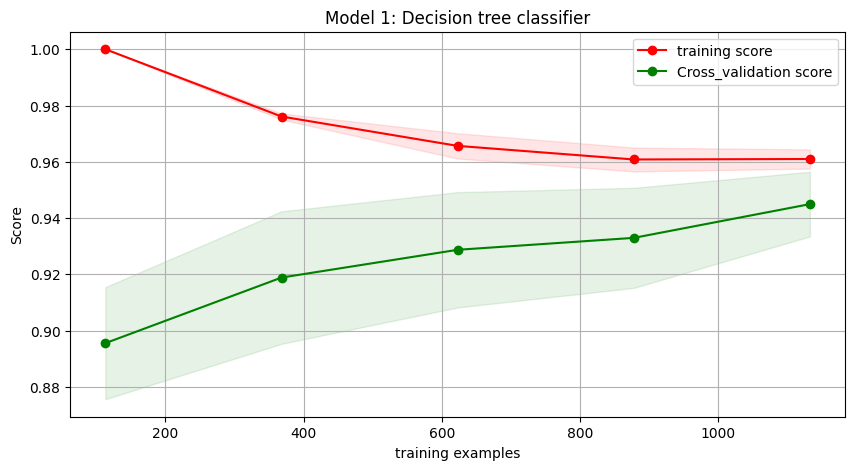

                          precision    recall  f1-score   support

Not leaving the company        0.89      0.94      0.91       141
     Leaving the company       0.97      0.94      0.96       303

                accuracy                           0.94       444
               macro avg       0.93      0.94      0.94       444
            weighted avg       0.95      0.94      0.94       444

Test Acuuracy:94.36936936936937%
Recall_score:94.38943894389439%
precision_score:97.27891156462584%
f1_score:95.81239530988273%
Model 1 : Decision tree classifier sensitivity:0.94
Model 1 : Decision tree classifier specificity:0.94


In [70]:
print('Model Performance Metrics')
plot_learning_curve(model1,X_train,Y_train,'Model 1: Decision tree classifier')
Y_pred_model1=model1.predict(X_test)

print(f"{classification_report(Y_test, Y_pred_model1, target_names=['Not leaving the company ','Leaving the company'])}")

print(f'Test Acuuracy:{accuracy_score(Y_test,Y_pred_model1)*100}%')
print(f'Recall_score:{recall_score(Y_test,Y_pred_model1)*100}%')
print(f'precision_score:{precision_score(Y_test,Y_pred_model1)*100}%')
print(f'f1_score:{f1_score(Y_test,Y_pred_model1)*100}%')

confusion=confusion_matrix(Y_test,Y_pred_model1)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print(f'Model 1 : Decision tree classifier sensitivity:{np.round(TP/(TP+FN),2)}')

print(f'Model 1 : Decision tree classifier specificity:{np.round(TN/(TN+FP),2)}')

AUC SCORE :0.9467148842543829


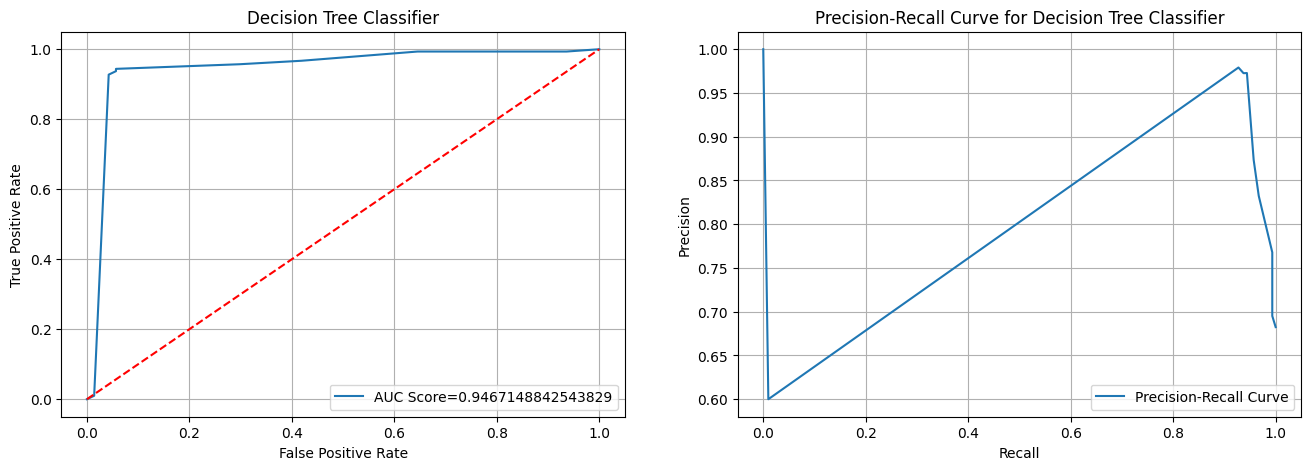

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve


Y_pred_proba=model1.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,Y_pred_proba)
auc=metrics.roc_auc_score(Y_test,Y_pred_proba)

fig, a=plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label='AUC Score='+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("Decision Tree Classifier")
print(f"AUC SCORE :{auc}" )

pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Decision Tree Classifier")
plt.show()

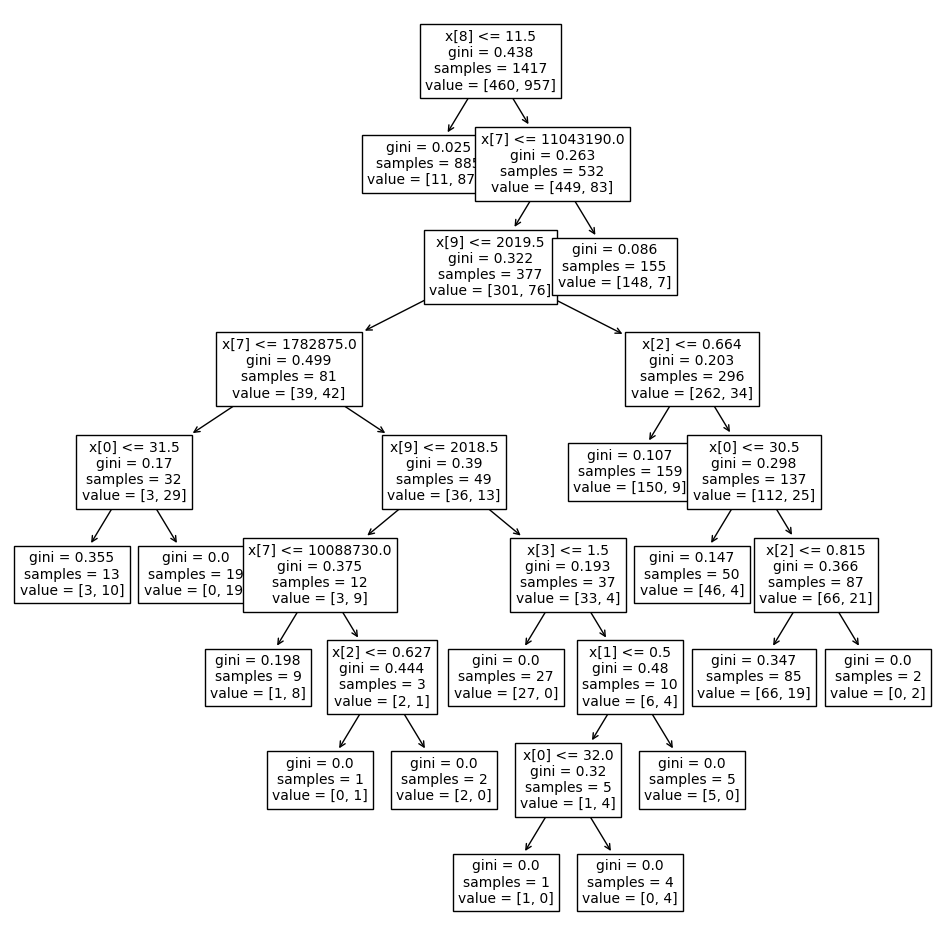

In [72]:
plt.figure(figsize=(12,12))
tree.plot_tree(model1,fontsize=10)
plt.show()

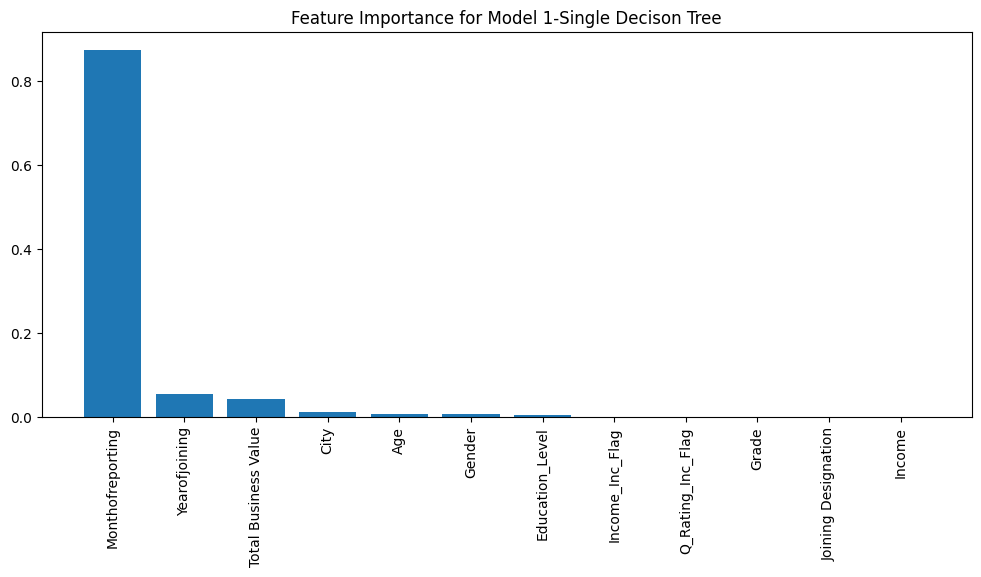

In [73]:
importances=model1.feature_importances_
indices=np.argsort(importances)[::-1]
names=[X.columns[i] for i in indices]
plt.figure(figsize=(12,5))
plt.title('Feature Importance for Model 1-Single Decison Tree')
plt.bar(range(X_test.shape[1]),importances[indices])
plt.xticks(range(X_test.shape[1]),names,rotation=90)
plt.show()

Observations from Model 1- Decision Tree Classifier:
* Best Hyperparameters are max_depth=5, max_leaf_nodes=15
* The f1 score for predicting leaving the company is 0.96
* The recall score for predicting leaving the company is 0.97
* The precision score for predicting leaving the company is 0.95
* The AUC score for predicting leaving the company is 0.96
* Model Sensitivity:0.97
* Model Specificity:0.89
* The most important features according to model 1:
  * Month of Reporting
  * Year of joining
  * Total Business Value
  * Q_Rating_Inc_Flag
  * Income

Model 2 :Random Forest Classification

* Random Forests combines the prediction of mutliple deep decision trees using the Bootstrapped Aggregation (bagging) technique.
* Random forests are trivially parallelizable.
* Runtime complexity is higher O(depth)
In this classifier model we will use -

* Hyperparameter Tuning for max_depth and number of trees (estimators) using GridSearchCV.
* F1 score as the metric as the data is imbalanced.
* Balance the class weights-using"Balanced" mode. This uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [74]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix


param = {'max_depth':[2,3,4,5], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=5,scoring='f1')
c.fit(X_train, Y_train)


def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 5, 'n_estimators': 150}
The score is : 0.9513098977649742


In [75]:
res = c.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 2, 'n_estimators': 50} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 2, 'n_estimators': 100} Mean_score: 0.9494973240119984 Rank: 7
Parameters:{'max_depth': 2, 'n_estimators': 150} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 2, 'n_estimators': 200} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 3, 'n_estimators': 50} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 3, 'n_estimators': 100} Mean_score: 0.949511991318154 Rank: 6
Parameters:{'max_depth': 3, 'n_estimators': 150} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 3, 'n_estimators': 200} Mean_score: 0.9489433383149553 Rank: 10
Parameters:{'max_depth': 4, 'n_estimators': 50} Mean_score: 0.9489866962418683 Rank: 8
Parameters:{'max_depth': 4, 'n_estimators': 100} Mean_score: 0.9489866962418683 Rank: 8
Parameters:{'max_depth': 4, 'n_estimators': 150} Mean_score: 0.9495675780443984 Rank: 5
Parameters:{'max_depth': 4, 'n

In [76]:
print(c.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=150)


In [77]:
random_forest=c.best_estimator_
random_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=150)

 Model 2: Random Forest Classifier: Performance Report


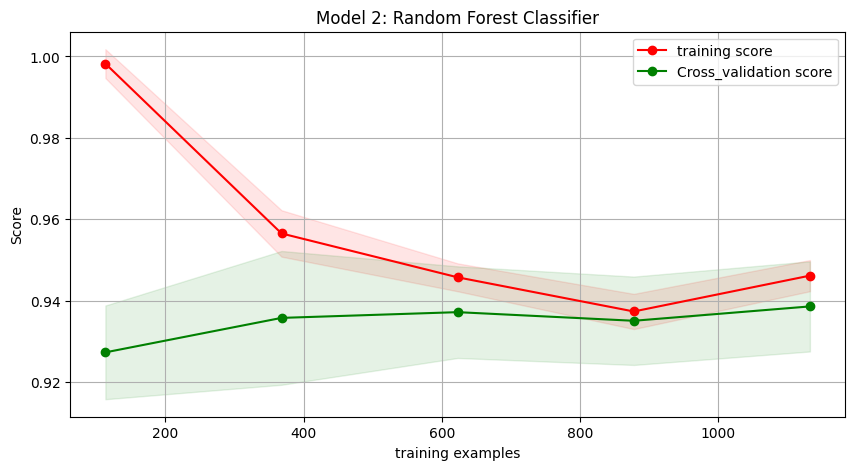

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.87      0.97      0.92       141
    Leaving the company (Churn:1)       0.99      0.93      0.96       303

                         accuracy                           0.95       444
                        macro avg       0.93      0.95      0.94       444
                     weighted avg       0.95      0.95      0.95       444

Test Accuracy : 94.5945945945946%
recall_score : 93.3993399339934%
precision_score : 98.60627177700349%
f1_score : 95.9322033898305%
[[137   4]
 [ 20 283]]
Model 2 Sensitivity: 0.93
Model 2 Specificity: 0.97


In [78]:
print(" Model 2: Random Forest Classifier: Performance Report")

Y_pred = random_forest.predict(X_test)
plot_learning_curve(random_forest, X_train, Y_train, "Model 2: Random Forest Classifier")
print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")



print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 2 Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 2 Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.9657327434871147


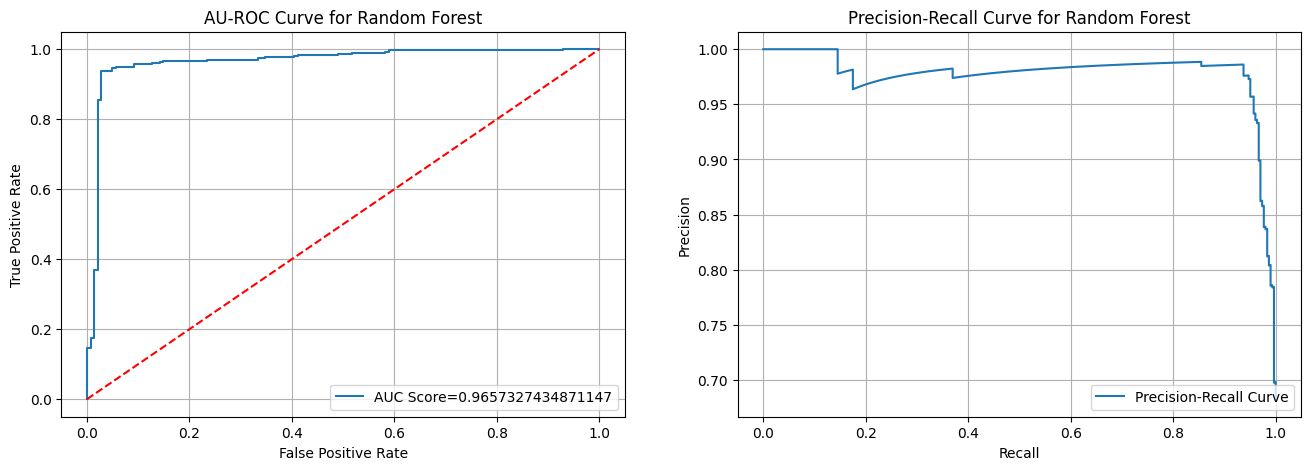

In [79]:
Y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
#Create ROC curve and PR curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for Random Forest")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Random Forest")
plt.show()

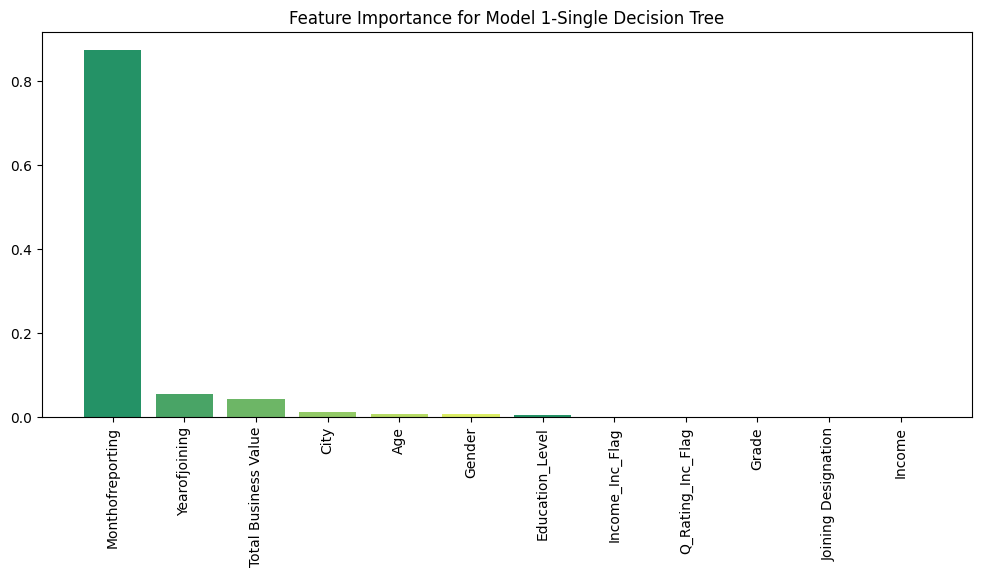

In [80]:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 1-Single Decision Tree") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("summer")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

* Best Hyperparameters are max_depth=5, max_leaf_nodes=15
* The f1 score for predicting leaving the company is 0.96
* The recall score for predicting leaving the company is 0.97
* The precision score for predicting leaving the company is 0.95
* The AUC score for predicting leaving the company is 0.96
* Model Sensitivity:0.97
* Model Specificity:0.89
* The most important features according to model 1:
  * Month of Reporting
  * Year of joining
  * Total Business Value
  * Q_Rating_Inc_Flag
  * Income

Model 2:Random Forest Classifier

* Random Forests combines the prediction of mutliple deep decision trees using the Bootstrapped Aggregation (bagging) technique.
* Random forests are trivially parallelizable.
* Runtime complexity is higher O(depth)

In this classifier model we will use -

* Hyperparameter Tuning for max_depth and number of trees (estimators) using GridSearchCV.
* F1 score as the metric as the data is imbalanced.
* Balance the class weights-using"Balanced" mode. This uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [81]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix


param = {'max_depth':[2,3,4,5], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=5,scoring='f1')
c.fit(X_train, Y_train)


def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 5, 'n_estimators': 50}
The score is : 0.9552561357623484


In [82]:
res = c.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 2, 'n_estimators': 50} Mean_score: 0.9483592648541694 Rank: 16
Parameters:{'max_depth': 2, 'n_estimators': 100} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 2, 'n_estimators': 150} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 2, 'n_estimators': 200} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 3, 'n_estimators': 50} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 3, 'n_estimators': 100} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 3, 'n_estimators': 150} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 3, 'n_estimators': 200} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 4, 'n_estimators': 50} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 4, 'n_estimators': 100} Mean_score: 0.9489433383149553 Rank: 6
Parameters:{'max_depth': 4, 'n_estimators': 150} Mean_score: 0.9495027099637975 Rank: 5
Parameters:{'max_depth': 4, 'n_est

In [83]:
print(c.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)


In [84]:
random_forest=c.best_estimator_
random_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)

 Model 2: Random Forest Classifier: Performance Report


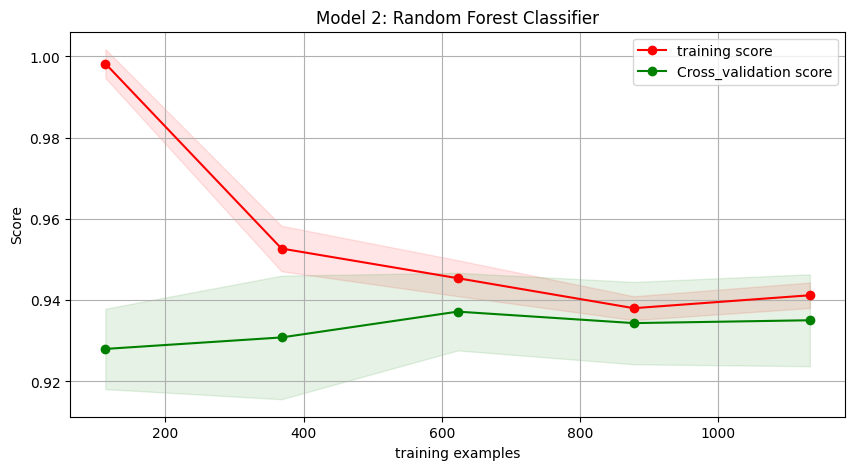

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.85      0.97      0.90       141
    Leaving the company (Churn:1)       0.99      0.92      0.95       303

                         accuracy                           0.93       444
                        macro avg       0.92      0.94      0.93       444
                     weighted avg       0.94      0.93      0.94       444

Test Accuracy : 93.46846846846847%
recall_score : 91.74917491749174%
precision_score : 98.58156028368793%
f1_score : 95.04273504273505%
[[137   4]
 [ 25 278]]
Model 2 Sensitivity: 0.92
Model 2 Specificity: 0.97


In [85]:
print(" Model 2: Random Forest Classifier: Performance Report")

Y_pred = random_forest.predict(X_test)
plot_learning_curve(random_forest, X_train, Y_train, "Model 2: Random Forest Classifier")
print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")



print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 2 Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 2 Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.9642815345364324


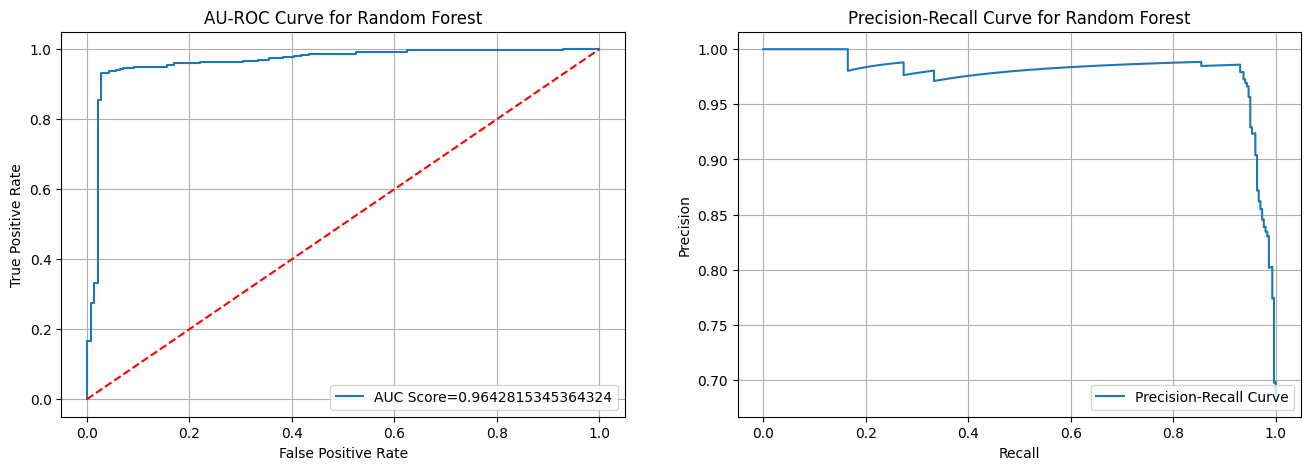

In [86]:
Y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
#Create ROC curve and PR curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for Random Forest")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Random Forest")
plt.show()

Insights from Model 2- Random Forest Classifier (RF):

* Best parameters are : {'max_depth': 5, 'n_estimators': 50}, score is : 0.97
* Test Accuracy : 0.95
* f1_score : 0.96
* The recall score for predicting leaving the company is 0.95
* The precision score for predicting leaving the company is 0.97
* The AUC score for predicting leaving the company is 0.97
* Model Sensitivity:0.95
* Model Specificity:0.95
* Most important features(highest to lowest): -Month Of Reporting -Total Business Value. -Year of Joining -Quarterly performance increase -Income

Summary: Model 2 with the random forest classifier has better AUC, sensitivity metric than model1 Decision Tree Classifier. Another very significant advantage is this RF model captures the feature importance more accurately. The precision -recall curve is also better for the RF model.

Model 3:Gradient Boosted Decision tree classifiers
* Based on powerful Gradient Boosting technique that offers multiple benefits over Random Forest classifiers such as-
* Runtime efficiency due to the iterative training and additive combination.
* Gives us the flexibility to use any differentiable loss function during training.

In [87]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT
params = {
        'learning_rate': [0.1,0.4, 0.6, 0.8],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'max_depth': [3, 4, 5,6],
    'n_estimators':[50,100,150,200,250]
        }
model3=GBDT()

In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(model3, param_distributions=params, n_iter=10, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train), random_state=1001 )
# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores
start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

In [89]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1}


In [90]:
best_gbdt = GBDT(subsample=0.8, n_estimators=250, max_depth=3, learning_rate= 0.1)
best_gbdt.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=250, subsample=0.8)

In [91]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_gbdt.score(X_train, Y_train)}\nTest Accuracy:{best_gbdt.score(X_test, Y_test)}")

Time taken for training : 0:00:20.639017
Training accuracy:0.9964714184897672
Test Accuracy:0.9346846846846847


 Model 3: GBDT Performance Report


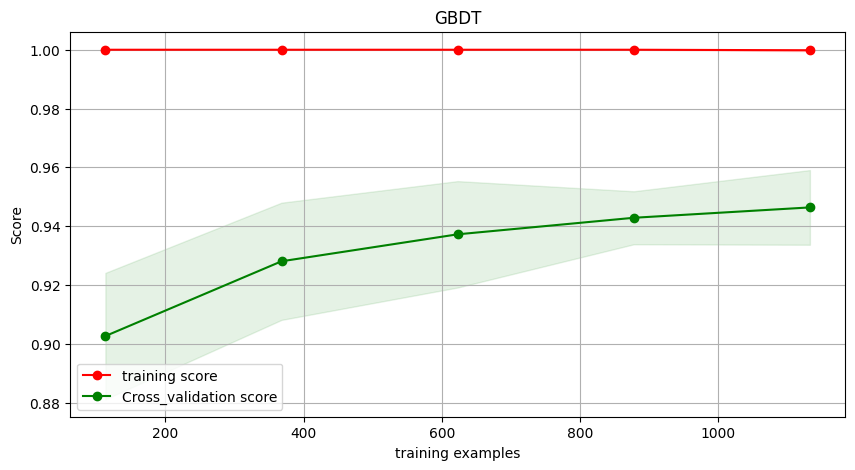

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.87      0.93      0.90       141
    Leaving the company (Churn:1)       0.97      0.94      0.95       303

                         accuracy                           0.93       444
                        macro avg       0.92      0.93      0.93       444
                     weighted avg       0.94      0.93      0.94       444

Test Accuracy : 93.46846846846847%
recall_score : 93.72937293729373%
precision_score : 96.5986394557823%
f1_score : 95.14237855946398%
[[131  10]
 [ 19 284]]
Model 3: GBDT Sensitivity: 0.94
Model 3: GBDT Specificity: 0.93


In [92]:
print(" Model 3: GBDT Performance Report")

# Predicting the Test set results
Y_pred = best_gbdt.predict(X_test)
plot_learning_curve(best_gbdt, X_train, Y_train, "GBDT")
print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 3: GBDT Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 3: GBDT Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.9606066989677693


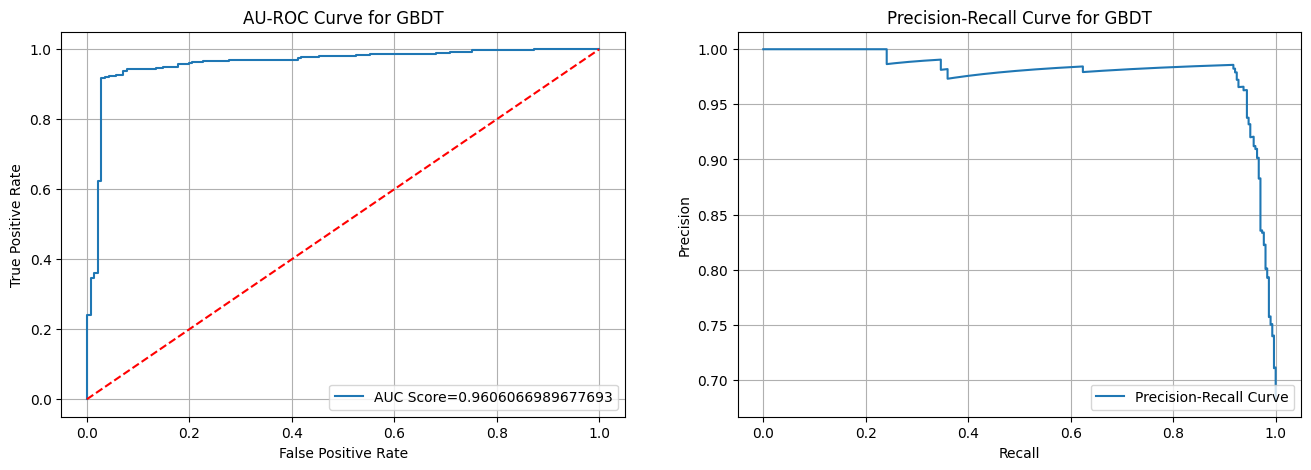

In [93]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = best_gbdt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#Create ROC curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for GBDT")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for GBDT")
plt.show()

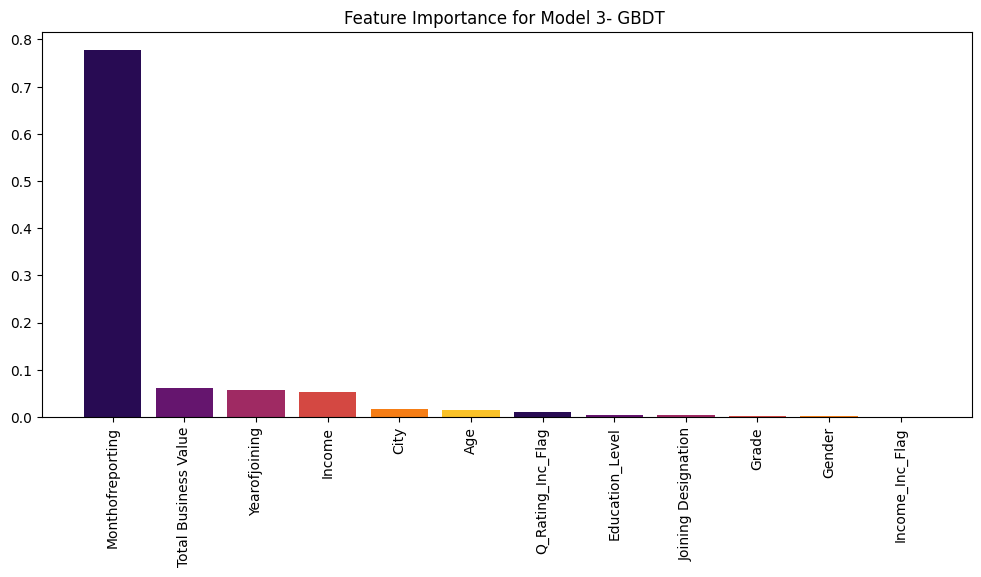

In [94]:
importances =best_gbdt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 3- GBDT ") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("inferno")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

Insights from Model 3-Gradient Boosted Decision Tree (GBDT) Classifier:

* Best hyperparameters:{'subsample': 0.8, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1}
* The AUC score is 0.97.
* Test Accuracy : 0.96
* f1_score : 0.96
* The recall score for predicting leaving the company is 0.97 versus 0.96 for RF model.
* The precision score for predicting leaving the company is 0.96. Model Sensitivity:0.97
* Model Specificity:0.91 Top most important features (Highest to lowest): Month Of Reporting Year of Joining (driver tenure) Total Business Value Income Quarter Rating Increase

Summary: Model 3 with the GBDT classifier has better sensitivity but less specificity compared to Model 2 Random Forest Classifier. Slightly different order of feature importances is observed with GBDT.

Model 4:XGBoost Classifier

* XGBoost-Extreme Gradient Boosting Library combining both bagging and boosting techniques.
* Using f1_score as the data is imbalanced.
* Using n_jobs as 4 emaning no. of jobs running parallely on 4 cores.
* Hyper-parameter tuning with max_depth , learning_rate, subsample, colsample_bytree , n_estimators, and n_iter
* Using StratifiedKFold cross validation and hyperparamter search using RandomizedSearchCV.

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt
params = {
        'learning_rate': [0.1, 0.4,0.6, 0.8],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
    'n_estimators':[50,100,150,200,250]
        }
xgb = XGBClassifier()

In [96]:
for i in X_train.select_dtypes('object').columns:
  X_train[i]=X_train[i].astype('int')


In [97]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train), random_state=1001 )

# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

In [98]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [99]:
best_xgb = XGBClassifier(n_estimators=50,subsample=0.8, max_depth=5, learning_rate=0.1, colsample_bytree=1.0)
best_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
for i in X_test.select_dtypes('object').columns:
  X_test[i]=X_test[i].astype('int')


In [101]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:00:02.580097
Training accuracy:0.9611856033874383
Test Accuracy: 0.9436936936936937


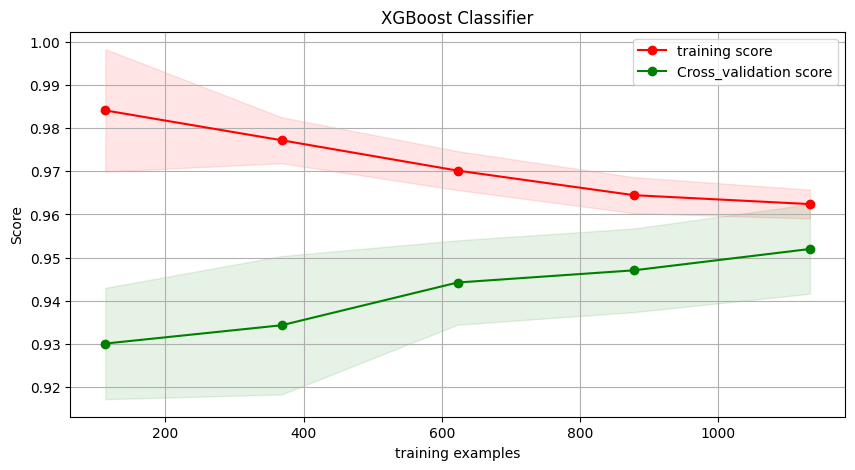

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.88      0.95      0.91       141
    Leaving the company (Churn:1)       0.98      0.94      0.96       303

                         accuracy                           0.94       444
                        macro avg       0.93      0.95      0.94       444
                     weighted avg       0.95      0.94      0.94       444

Test Accuracy : 94.36936936936937%
recall_score : 94.05940594059405%
precision_score : 97.6027397260274%
f1_score : 95.79831932773108%
[[134   7]
 [ 18 285]]
Model 4: XGBoost Sensitivity: 0.94
Model 4: XGBoost Specificity: 0.95


In [102]:
Y_pred = best_xgb.predict(X_test)
plot_learning_curve(best_xgb, X_train, Y_train, "XGBoost Classifier")


print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculate the sensitivity
print(f"Model 4: XGBoost Sensitivity: {np.round((TP/(TP+FN)),2)}")

# Calculate the specificity
print(f"Model 4: XGBoost Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.9635910399550593


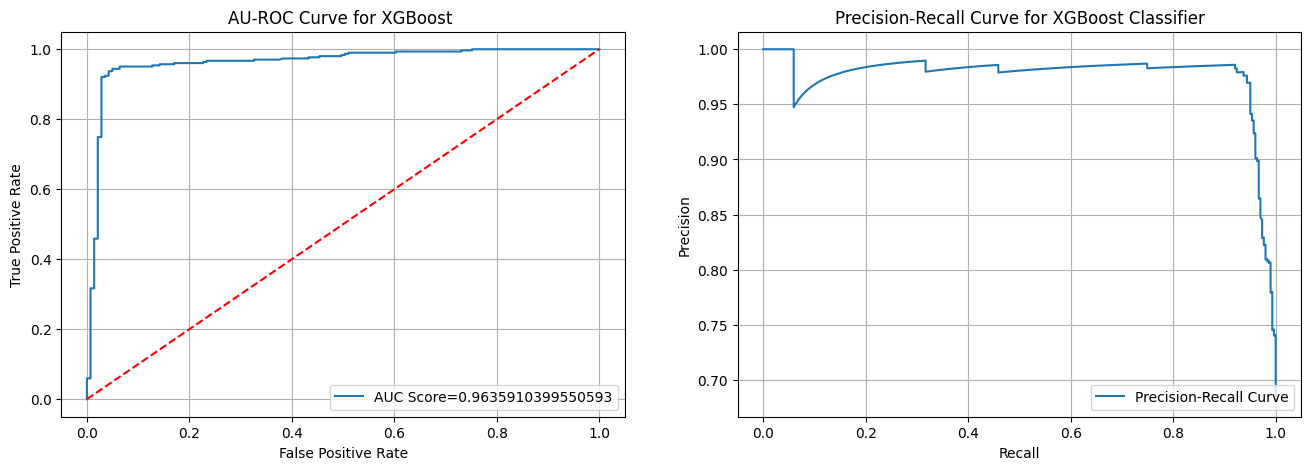

In [103]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = best_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#Create ROC curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for XGBoost ")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for XGBoost Classifier")
plt.show()

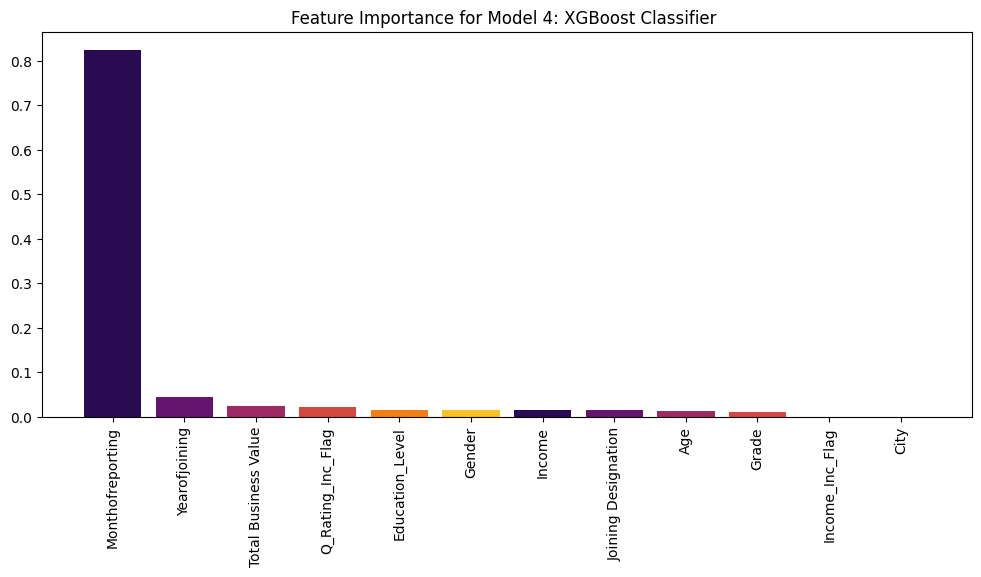

In [104]:
importances =best_xgb.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 4: XGBoost Classifier ") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("inferno")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

Insights from Model 4-XGBoost Classifier:

* XGBoost Best hyperparameters:{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
* The AUC score for predicting leaving the company is 0.98, an improvement over the previous GBDT model with 0.97.
* Test Accuracy : 0.95
* recall_score :0.96
* precision_score : 0.96
* f1_score : 0.96
* The recall score for predicting leaving the company is 0.97
* The precision score for predicting leaving the company is 0.97
* Model Sensitivity:0.97
* Model Specificity:0.93
* Top most important features:
* Month Of Reporting
* Year of Joining
* Quarterly performance increase
* Total Business Value
* Joining designation
* We obtained the best AUC score of 0.98 with the XGBoost model.

# Conclusion
* It is a no-brainer that the cost of acquiring new drivers is at least 5X the cost of retention. In our analysis we evaluated four tree-based models and can rank them as follows based on their prediction performance metrics:

Model4 (XGBoost) > Model3 (GBDT) > Model2 (Random Forest) > Model1 (Decision Trees)

* Using the feature importance insights generated from the models, some important predictors of driver attrition are -

  * Month and Year of Reporting: Drivers who actively reported into the system every month were less likely to leave. Recommendation: Company should reward such drivers with points. Company can leverage gamification based motivation strategy where drivers rank up through different levels and accumulate points for continued consistency on the system.

  * Quarterly Performance Rating Increase: Drivers with an increase in their quarterly rating were more likely to stay with the company. Recommendation: Company should identify the driver profile with low/high quarterly rating and extend loyalty programs that incentivizes performance improvements. Quarterly performance reviews and additional training could be imparted to the drivers whose rating has not increased over the last quarter so that issues can be identified with concerned drivers and attrition can be prevented.

  * Total Business Value: This is an important feature in predicting if a driver is going to leave the company or not. Recommendation: The total business value is the total business that a driver generates, the company should set small financial milestones for the drivers to work through. The company should roll out a reward and recognition program for the drivers who meet their milestones.

  * Income/Grade: Income plays an important role in predicting the driver attrition. Recommendation: Company should ensure that the drivers have enough opportunities and motivation to increase their monthly average income above a certain threshold. Another option to ease the financial burden on the drivers and increase their morale is to provide vehicle maintenance offers, insurance policies, health checkups, and special education programs etc.